# HW2

## Part 1

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression as LM
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression as GLM
from sklearn.neighbors import KNeighborsClassifier as KNC
%matplotlib inline

In [218]:
# read caschool and take off replicated serial as index
caschool = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
caschool = caschool.iloc[:,1:]
caschool.head()

,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024


### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

Text(0, 0.5, 'Count')

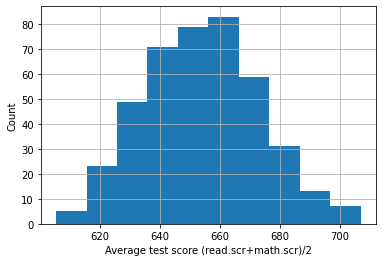

In [220]:
caschool.testscr.hist()
plt.xlabel('Average test score (read.scr+math.scr)/2')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

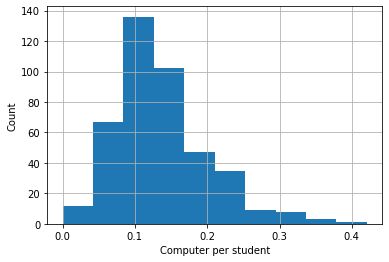

In [221]:
caschool.compstu.hist()
plt.xlabel('Computer per student')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

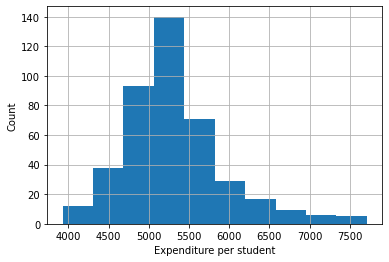

In [222]:
caschool.expnstu.hist()
plt.xlabel('Expenditure per student')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

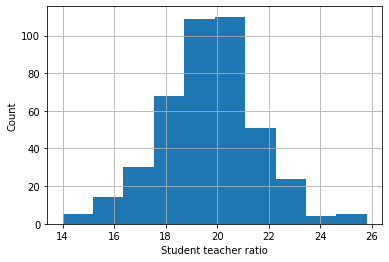

In [223]:
caschool.str.hist()
plt.xlabel('Student teacher ratio')
plt.ylabel('Count')

### 1.2 Visualize the dependency of the target on each feature from 1.1.

Text(0, 0.5, 'Percent qualifying for reduced-price lunch')

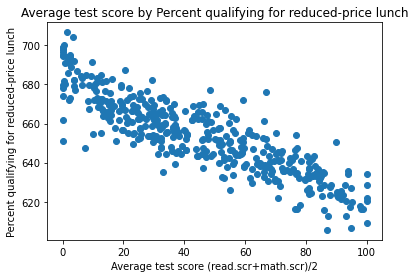

In [224]:
plt.scatter(caschool.mealpct, caschool.testscr)
plt.title('Average test score by Percent qualifying for reduced-price lunch')
plt.xlabel('Average test score (read.scr+math.scr)/2')
plt.ylabel('Percent qualifying for reduced-price lunch')

Text(0, 0.5, 'District average income')

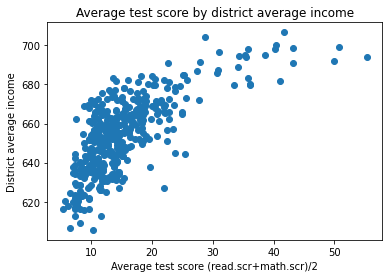

In [225]:
plt.scatter(caschool.avginc, caschool.testscr)
plt.title('Average test score by district average income')
plt.xlabel('Average test score (read.scr+math.scr)/2')
plt.ylabel('District average income')

Text(0, 0.5, 'Percent of English learners')

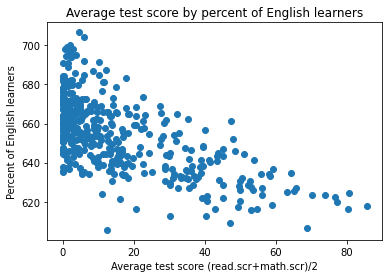

In [226]:
plt.scatter(caschool.elpct, caschool.testscr)
plt.title('Average test score by percent of English learners')
plt.xlabel('Average test score (read.scr+math.scr)/2')
plt.ylabel('Percent of English learners')

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [239]:
# generate iv/dv
X = caschool.drop(['distcod','county','district','grspan','testscr','readscr','mathscr'], axis=1)
y = caschool.testscr

In [240]:
# split train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=3)
X_train.shape

(315, 10)

In [241]:
# create cv
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

In [242]:
# knn algorithm
np.random.seed(23)
knn = KNN(n_neighbors=5)
knn_kfold = mean(cross_val_score(knn, X_train, y_train, cv=kfold))
knn_rkfold = mean(cross_val_score(knn, X_train, y_train, cv=rkf))
print("knn algorithm")
print("KFold: {}".format(knn_kfold))
print("RepeatedKFold: {}".format(knn_rkfold))

knn algorithm
KFold: -0.004972701872224117
RepeatedKFold: -0.024620987262821203


In [243]:
# linear regression
reg = LM()
lm_kfold = mean(cross_val_score(reg, X_train, y_train, cv=kfold))
lm_rkfold = mean(cross_val_score(reg, X_train, y_train, cv=rkf))
print("linear regression")
print("KFold: {}".format(lm_kfold))
print("RepeatedKFold: {}".format(lm_rkfold))

linear regression
KFold: 0.7910219660775242
RepeatedKFold: 0.7836687968977649


In [244]:
# ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_train = ridge.score(X_train, y_train)
ridge_test = ridge.score(X_test, y_test)
print("ridge regression")
print("Training set score: {}".format(ridge_train))
print("Test set score: {}".format(ridge_test))

ridge regression
Training set score: 0.8029115850522787
Test set score: 0.8255426669973926


In [245]:
# lasso algorithm
lasso = Lasso().fit(X_train, y_train)
lasso_train = lasso.score(X_train, y_train)
lasso_test = lasso.score(X_test, y_test)
num_fea_used = np.sum(lasso.coef_ != 0)
print("lasso algorithm")
print("Training set score: {}".format(lasso_train))
print("Test set score: {}".format(lasso_test))
print("Number of features used: {}".format(num_fea_used))

lasso algorithm
Training set score: 0.7991806682958165
Test set score: 0.8345802541393493
Number of features used: 7


In [249]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
# knn algorithm after scaler
np.random.seed(23)
knn = KNN(n_neighbors=5)
knn_kfold_as = mean(cross_val_score(knn, X_train_scaled, y_train, cv=kfold))
knn_rkfold_as = mean(cross_val_score(knn, X_train_scaled, y_train, cv=rkf))
print("knn algorithm after scaler")
print("KFold: {}".format(knn_kfold_as))
print("RepeatedKFold: {}".format(knn_rkfold_as))

knn algorithm after scaler
KFold: -0.13340158674133132
RepeatedKFold: -0.15015145458144996


In [74]:
# linear regression after scaler
reg = LM()
lm_kfold_as = mean(cross_val_score(reg, X_train_scaled, y_train, cv=kfold))
lm_rkfold_as = mean(cross_val_score(reg, X_train_scaled, y_train, cv=rkf))
print("linear regression after scaler")
print("KFold: {}".format(lm_kfold))
print("RepeatedKFold: {}".format(lm_rkfold))

linear regression after scaler
KFold: 0.7910219660775242
RepeatedKFold: 0.7836687968977649


In [75]:
# ridge regression after scaler
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
ridge_train_as = ridge.score(X_train_scaled, y_train)
ridge_test_as = ridge.score(X_test_scaled, y_test)
print("ridge regression after scaler")
print("Training set score: {}".format(ridge_train))
print("Test set score: {}".format(ridge_test))

ridge regression after scaler
Training set score: 0.8029115850522787
Test set score: 0.8255426669973926


In [76]:
# lasso algorithm after scaler
lasso = Lasso().fit(X_train_scaled, y_train)
lasso_train_as = lasso.score(X_train_scaled, y_train)
lasso_test_as = lasso.score(X_test_scaled, y_test)
num_fea_used_as = np.sum(lasso.coef_ != 0)
print("lasso algorithm after scaler")
print("Training set score: {}".format(lasso_train))
print("Test set score: {}".format(lasso_test))
print("Number of features used: {}".format(num_fea_used))

lasso algorithm after scaler
Training set score: 0.7991806682958165
Test set score: 0.8345802541393493
Number of features used: 7


In [77]:
sclaer_com = pd.DataFrame({'before scaler': pd.Series([knn_kfold, knn_rkfold, lm_kfold, lm_rkfold, ridge_train, ridge_test, lasso_train, lasso_test],
              index = ['knn_kfold', 'knn_rkfold', 'lm_kfold', 'lm_rkfold', 'ridge_train', 'ridge_test', 'lasso_train', 'lasso_test']),
             'after scaler': pd.Series([knn_kfold_as, knn_rkfold_as, lm_kfold_as, lm_rkfold_as, ridge_train_as, ridge_test_as, lasso_train_as, lasso_test_as],
             index = ['knn_kfold', 'knn_rkfold', 'lm_kfold', 'lm_rkfold', 'ridge_train', 'ridge_test', 'lasso_train', 'lasso_test'])
             })
sclaer_com

,before scaler,after scaler
knn_kfold,-0.004973,-0.133402
knn_rkfold,-0.024621,-0.150151
lm_kfold,0.791022,0.792757
lm_rkfold,0.783669,0.786343
ridge_train,0.802912,0.104761
ridge_test,0.825543,-888.990486
lasso_train,0.799181,0.080985
lasso_test,0.834580,-0.013639


#### As we can see from above scaler comparsion data frame, StandardScaler works various in different model.
- Not much difference (<0.001): lm_kfold, lm_rkfold, ridge_train, ridge_test, lasso_train
- Better(>=0.001): knn_kfold, knn_rkfold, lasso_test

### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [78]:
from sklearn.pipeline import make_pipeline
knn_pipe = make_pipeline(StandardScaler(), KNN())

#refer to step name with two underscores before argument name when...
#you build a parameter grid

param_grid = {'kneighborsregressor__n_neighbors': range(1, 10)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train, y_train)
best_nn_knn = grid.best_params_
best_knn = grid.score(X_test, y_test)
print(best_nn_knn)
print(best_knn)

{'kneighborsregressor__n_neighbors': 9}
0.8039568361272176


In [79]:
lm_pipe = make_pipeline(StandardScaler(), LM())

alpha_grid = {'linearregression__fit_intercept':[True, False],
             'linearregression__normalize':[True, False],
             'linearregression__n_jobs':np.arange(0,10,0.1)}
grid = GridSearchCV(lm_pipe, param_grid=alpha_grid)
grid.fit(X_train, y_train)
best_alpha_lm = grid.best_params_
best_lm = grid.score(X_test, y_test)
print(best_alpha_lm)
print(best_lm)

{'linearregression__fit_intercept': True, 'linearregression__n_jobs': 0.0, 'linearregression__normalize': False}
0.8154571538826472


In [80]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge())

alpha_grid = {'ridge__alpha':np.arange(0,10,0.1)}
grid = GridSearchCV(ridge_pipe, param_grid=alpha_grid)
grid.fit(X_train, y_train)
best_alpha_ridge = grid.best_params_
best_ridge = grid.score(X_test, y_test)
print(best_alpha_ridge)
print(best_ridge)

{'ridge__alpha': 9.600000000000001}
0.8195881320983868


In [81]:
import warnings
warnings.filterwarnings('ignore')
lasso_pipe = make_pipeline(StandardScaler(), Lasso())

alpha_grid = {'lasso__alpha':np.arange(0,10,0.1)}
grid = GridSearchCV(lasso_pipe, param_grid=alpha_grid)
grid.fit(X_train, y_train)
best_alpha_lasso = grid.best_params_
best_lasso = grid.score(X_test, y_test)
print(best_alpha_lasso)
print(best_lasso)

{'lasso__alpha': 0.1}
0.818844490474484


In [82]:
comparison = {'before scaler': [knn_kfold, lm_kfold, ridge_test, lasso_test],
             'afrer scaler': [knn_kfold_as, lm_kfold_as, ridge_test_as, lasso_test_as],
             'gridseachcv': [best_knn, best_lm, best_ridge, best_lasso]}
com = pd.DataFrame(comparison, index=['knn', 'lm', 'ridge', 'lasso'])
com

,before scaler,afrer scaler,gridseachcv
knn,-0.004973,-0.133402,0.803957
lm,0.791022,0.792757,0.815457
ridge,0.825543,-888.990486,0.819588
lasso,0.834580,-0.013639,0.818844


- All results improve using GridSearchCV except lasso

### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [83]:
# ridge regression
ridge_pipe = make_pipeline(StandardScaler(), Ridge(alpha=best_alpha_ridge['ridge__alpha']))

ridge_pipe.fit(X_train, y_train)
best_ridge = ridge_pipe.score(X_test, y_test)
print('Test accuracy: {}'.format(best_ridge))
np.argsort(ridge_pipe['ridge'].coef_)[::-1]

# ridge regression
# ridge = Ridge(alpha=best_alpha_ridge['ridge__alpha'])
# ridge.fit(X_train,y_train)
# print('Test accuracy: {}'.format(ridge.score(X_test,y_test)))
# np.argsort(ridge.coef_)[::-1]

Test accuracy: 0.8195881320983868


array([8, 5, 6, 0, 1, 4, 7, 2, 9, 3], dtype=int64)

In [84]:
# lasso algorithm
import warnings
warnings.filterwarnings('ignore')
lasso_pipe = make_pipeline(StandardScaler(), Lasso(alpha=best_alpha_lasso['lasso__alpha']))

lasso_pipe.fit(X_train, y_train)
best_lasso = grid.score(X_test, y_test)
print('Test accuracy: {}'.format(best_lasso))
np.argsort(lasso_pipe['lasso'].coef_)[::-1]

# lasso algorithm
# lasso = Lasso(alpha=best_alpha_lasso['lasso__alpha']).fit(X_train, y_train)
# print('Test accuracy:', lasso.score(X_test,y_test))
# np.argsort(lasso.coef_)[::-1]

Test accuracy: 0.818844490474484


array([8, 5, 6, 4, 1, 0, 7, 2, 9, 3], dtype=int64)

### 1.6 Discuss which final model you would choose to predict new data

- I would use Ridge Regression to be my final since it have best accuracy after tuning models.

## Part 2

### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

In [85]:
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep = ';')
white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep = ';') 
red['winetype'] = 1
white['winetype'] = 0
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [86]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [87]:
wine = pd.concat([red,white])
wine.shape

(6497, 13)

### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature. 

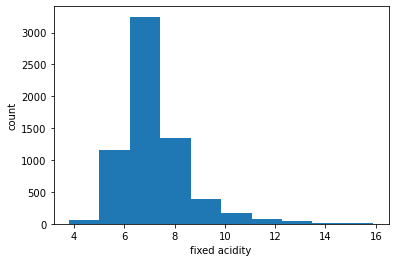

In [88]:
plt.xlabel('fixed acidity')
plt.ylabel('count')
plt.hist(wine['fixed acidity'])
plt.show()

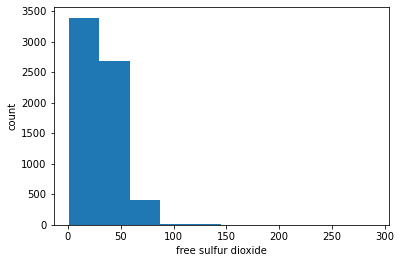

In [89]:
plt.xlabel('free sulfur dioxide')
plt.ylabel('count')
plt.hist(wine['free sulfur dioxide'])
plt.show()

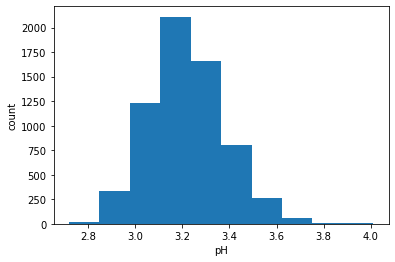

In [90]:
plt.xlabel('pH')
plt.ylabel('count')
plt.hist(wine.pH)
plt.show()

### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?

In [91]:
X = wine.drop('winetype', axis=1)
y = wine.winetype
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [131]:
knc = KNC()
knc.fit(X_train,y_train)
knc_test = knc.score(X_test,y_test)
knc_test_cv = mean(cross_val_score(knc, X_train, y_train))
print('KNN\narrcuracy: {}'.format(knc_test))
knc_test_cv

KNN
arrcuracy: 0.9483076923076923


0.9365772653082715

In [127]:
glm = GLM(penalty='none')
glm.fit(X_train, y_train)
glm_none = glm.score(X_test,y_test)
glm_none_cv = mean(cross_val_score(glm, X_train, y_train))
print('Logistic Regression\naccuracy: {}'.format(glm_none))
glm_none_cv

Logistic Regression
accuracy: 0.9858461538461538


0.9778326751961249

In [128]:
glm_lasso = GLM(penalty='l1', solver='liblinear')
glm_lasso.fit(X_train, y_train)
glm_l1 = glm_lasso.score(X_test,y_test)
glm_l1_cv = mean(cross_val_score(glm_lasso, X_train, y_train))
print('Logistic Regression\naccuracy: {}'.format(glm_l1))
glm_l1_cv

Logistic Regression
accuracy: 0.9932307692307693


0.9839905228241984

In [129]:
glm_ridge = GLM(penalty='l2')
glm_ridge.fit(X_train, y_train)
glm_l2 = glm_ridge.score(X_test,y_test)
glm_l2_cv = mean(cross_val_score(glm_ridge, X_train, y_train))
print('Logistic Regression\naccuracy: {}'.format(glm_l2))
glm_l2_cv

Logistic Regression
accuracy: 0.984


0.9735224556415522

In [132]:
# scale
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [133]:
glm = GLM(penalty='none')
glm.fit(X_train_scaled, y_train)
glm_none_scaled = glm.score(X_test_scaled,y_test)
glm_none_scaled_cv = mean(cross_val_score(glm, X_train_scaled, y_train))
print('Logistic Regression after scaler\naccuracy: {}'.format(glm_none_scaled))
glm_none_scaled_cv

Logistic Regression after scaler
accuracy: 0.9944615384615385


0.9940485442004949

In [134]:
glm_lasso = GLM(penalty='l1', solver='liblinear')
glm_lasso.fit(X_train_scaled, y_train)
glm_l1_scaled = glm_lasso.score(X_test_scaled,y_test)
glm_l1_scaled_cv = mean(cross_val_score(glm_lasso, X_train_scaled, y_train))
print('Logistic Regression after scaler\naccuracy: {}'.format(glm_l1_scaled))
glm_l1_scaled_cv

Logistic Regression after scaler
accuracy: 0.9956923076923077


0.9938429947875533

In [135]:
glm_ridge = GLM(penalty='l2')
glm_ridge.fit(X_train_scaled, y_train)
glm_l2_scaled = glm_ridge.score(X_test_scaled,y_test)
glm_l2_scaled_cv = mean(cross_val_score(glm_ridge, X_train_scaled, y_train))
print('Logistic Regression after scaler\naccuracy: {}'.format(glm_l2_scaled))
glm_l2_scaled_cv

Logistic Regression after scaler
accuracy: 0.9956923076923077


0.9926113831411573

In [137]:
knc = KNC()
knc.fit(X_train_scaled,y_train)
knc_scaled = knc.score(X_test_scaled,y_test)
knc_scaled_cv = mean(cross_val_score(knc, X_train_scaled, y_train))
print('KNN after scaler\narrcuracy: {}'.format(knc_scaled))
knc_scaled_cv

KNN after scaler
arrcuracy: 0.9932307692307693


0.9928163007423787

In [140]:
comparison = {'before scaler': [knc_test_cv, glm_none_cv, glm_l1_cv, glm_l2_cv],
             'afrer scaler': [knc_scaled_cv, glm_none_scaled_cv, glm_l2_scaled_cv, glm_l2_scaled_cv]}
com = pd.DataFrame(comparison, index=['knc', 'glm_none', 'l1', 'l2'])
com

,before scaler,afrer scaler
knc,0.936577,0.992816
glm_none,0.977833,0.994049
l1,0.983991,0.992611
l2,0.973522,0.992611


- StandardScaler improves the accuracy on both model.

### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?

In [153]:
param_grid = {'n_neighbors': range(1, 10)}

grid = GridSearchCV(KNC(), param_grid=param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
grid.best_score_

{'n_neighbors': 2}


0.9942521964520147

In [154]:
c_space = np.arange(0,10,0.5)
param_grid = {'C': c_space, 'penalty': ['none', 'l1', 'l2']}

grid = GridSearchCV(GLM(), param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
grid.best_score_

{'C': 0.0, 'penalty': 'none'}


0.9938427811626889

 - Both the results improve

### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change?

In [155]:
# create cv
kfold = KFold(n_splits=5)
skfold = StratifiedKFold(n_splits=5, shuffle=True)
rkf = RepeatedKFold(n_splits=5, n_repeats=10)

In [175]:
param_grid = {'n_neighbors': range(1, 10)}
grid = GridSearchCV(KNC(), param_grid=param_grid, cv=skfold)
grid.fit(X_train_scaled, y_train)
knc_skfold_best_param = grid.best_params_
knc_skfold_best_sc = grid.best_score_
print(f"skfold_param: {knc_skfold_best_param}")
knc_skfold_best_sc

skfold_param: {'n_neighbors': 4}


0.9940481229926815

In [184]:
param_grid = {'n_neighbors': range(1, 10)}
grid = GridSearchCV(KNC(), param_grid=param_grid, cv=kfold)
grid.fit(X_train_scaled, y_train)
knc_kfold_best_param = grid.best_params_
knc_kfold_best_sc = grid.best_score_
print(f"kfold_param: {knc_kfold_best_param}")
knc_kfold_best_sc

kfold_param: {'n_neighbors': 4}


0.994253040593903

In [179]:
c = np.arange(0,10,0.1)
param_grid = {'C': c, 'penalty': ['none', 'l1', 'l2']}

grid = GridSearchCV(GLM(), param_grid, cv = skfold)
grid.fit(X_train_scaled, y_train)
glm_skfold_best_param = grid.best_params_
glm_skfold_best_sc = grid.best_score_
print(f"skfold_param: {glm_skfold_best_param}")
glm_skfold_best_sc

skfold_param: {'C': 5.7, 'penalty': 'l2'}


0.9938427841836465

In [180]:
c = np.arange(0,10,0.1)
param_grid = {'C': c, 'penalty': ['none', 'l1', 'l2']}

grid = GridSearchCV(GLM(), param_grid, cv = kfold)
grid.fit(X_train_scaled, y_train)
glm_kfold_best_param = grid.best_params_
glm_kfold_best_sc = grid.best_score_
print(f"kfold_param: {glm_kfold_best_param}")
glm_kfold_best_sc

kfold_param: {'C': 0.0, 'penalty': 'none'}


0.9940485442004949

In [186]:
comparison = {'skfold': [knc_skfold_best_param, knc_skfold_best_sc, glm_skfold_best_param, glm_skfold_best_sc],
             'kfold': [knc_kfold_best_param, knc_kfold_best_sc, glm_kfold_best_param, glm_kfold_best_sc]}
com = pd.DataFrame(comparison, index=['knc_best_param', 'knc_best_sc', 'glm_best_param', 'glm_best_sc'])
com

,skfold,kfold
knc_best_param,{'n_neighbors': 4},{'n_neighbors': 4}
knc_best_sc,0.994048,0.994253
glm_best_param,"{'C': 5.7, 'penalty': 'l2'}","{'C': 0.0, 'penalty': 'none'}"
glm_best_sc,0.993843,0.994049


- The parameters for models change in Logistic Regression but not for KNeighborsClassifier from ‘stratified k-fold’ to ‘kfold’ with shuffling.

### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and among all models you experimented with, discuss which final model you would choose to predict new data.

In [214]:
c = np.arange(0,10,0.1)
param_grid = {'C': c, 'penalty': ['none', 'l1', 'l2']}

grid = GridSearchCV(GLM(), param_grid)
grid.fit(X_train_scaled, y_train)
lr_best_param = grid.best_params_
lr_best_sc = grid.best_score_
print(lr_best_param)
lr_best_sc

{'C': 0.0, 'penalty': 'none'}


0.9940485442004949

In [215]:
glm_p = GLM(C=lr_best_param['C'],penalty=lr_best_param['penalty'])
glm_p.fit(X_train_scaled, y_train)
print('with penalty accuracy: {}'.format(glm_p.score(X_test_scaled,y_test)))
glm_coef = glm_p.coef_

with penalty accuracy: 0.9944615384615385


In [216]:
glm_p = GLM(C=lr_best_param['C'],penalty='none')
glm_p.fit(X_train_scaled, y_train)
print('no penalty accuracy:', glm_p.score(X_test_scaled,y_test))
glm_coef1 = glm_p.coef_

no penalty accuracy: 0.9944615384615385


In [262]:
print(np.argsort(glm_coef)[::-1])
print(np.argsort(glm_coef1)[::-1])

[[ 3  6  0  2  8 11  9  4  5  1 10  7]]
[[ 3  6  0  2  8 11  9  4  5  1 10  7]]


- The LogisticRegression and penalized LogisticRegression agree on the same the feature.Logistic Regression model have higher accuracy, I would choose LogisticRegression to predict new data.

In [263]:
spam = pd.read_csv('C:/Users/Administrator/Desktop/CU/CU_SM2022/QMSSS5073_001_2022_2 - MACHINE LEARNING SOC SCI/mt/spam_dataset.csv')
spam.head(6)

,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [294]:
spam.columns

Index(['word_freq_make:', 'word_freq_address:', 'word_freq_all:',
       'word_freq_3d:', 'word_freq_our:', 'word_freq_over:',
       'word_freq_remove:', 'word_freq_internet:', 'word_freq_order:',
       'word_freq_mail:', 'word_freq_receive:', 'word_freq_will:',
       'word_freq_people:', 'word_freq_report:', 'word_freq_addresses:',
       'word_freq_free:', 'word_freq_business:', 'word_freq_email:',
       'word_freq_you:', 'word_freq_credit:', 'word_freq_your:',
       'word_freq_font:', 'word_freq_000:', 'word_freq_money:',
       'word_freq_hp:', 'word_freq_hpl:', 'word_freq_george:',
       'word_freq_650:', 'word_freq_lab:', 'word_freq_labs:',
       'word_freq_telnet:', 'word_freq_857:', 'word_freq_data:',
       'word_freq_415:', 'word_freq_85:', 'word_freq_technology:',
       'word_freq_1999:', 'word_freq_parts:', 'word_freq_pm:',
       'word_freq_direct:', 'word_freq_cs:', 'word_freq_meeting:',
       'word_freq_original:', 'word_freq_project:', 'word_freq_re:',
       '

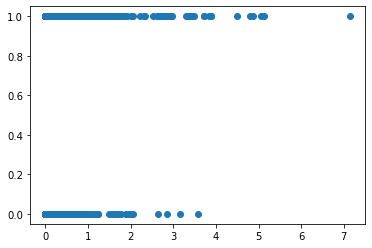

In [338]:
import matplotlib.pyplot as plt
plt.scatter(spam['word_freq_business:'], spam.spam)